# SocioPatterns

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
import igraph as ig
import dionysus as d

In [19]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = 10, 6

## Data import

In [20]:
import os

datadir = "data/sociopatterns/infectious/INFECTIOUS_cumulative_daily_networks/"
files = [os.path.join(datadir, f) for f in os.listdir(datadir)]
gs = []
for f in files:
    gs.append(ig.read(f))

In [21]:
gs[0].summary()

'IGRAPH U-W- 242 1092 -- \n+ attr: id (v), weight (e)'

In [22]:
len(gs)

69

## Persistent homology

In [23]:
from filtration import wrcf

In [24]:
def get_diagram(graph, weight="weight"):
    filt = wrcf(graph, weight=weight)
    pers = d.homology_persistence(filt)
    return(d.init_diagrams(pers, filt))

In [25]:
from dask.distributed import Client

In [26]:
client = Client(processes=False)

In [27]:
dgms = client.map(get_diagram, gs)

distributed.comm.inproc - WARNING - Closing dangling queue in <InProc local=inproc://129.67.184.177/8979/38 remote=inproc://129.67.184.177/8979/32>
distributed.comm.inproc - WARNING - Closing dangling queue in <InProc local=inproc://129.67.184.177/8979/39 remote=inproc://129.67.184.177/8979/32>
distributed.comm.inproc - WARNING - Closing dangling queue in <InProc local=inproc://129.67.184.177/8979/40 remote=inproc://129.67.184.177/8979/32>
distributed.comm.inproc - WARNING - Closing dangling queue in <InProc local=inproc://129.67.184.177/8979/41 remote=inproc://129.67.184.177/8979/32>
distributed.comm.inproc - WARNING - Closing dangling queue in <InProc local=inproc://129.67.184.177/8979/42 remote=inproc://129.67.184.177/8979/32>
distributed.comm.inproc - WARNING - Closing dangling queue in <InProc local=inproc://129.67.184.177/8979/43 remote=inproc://129.67.184.177/8979/32>
distributed.comm.inproc - WARNING - Closing dangling queue in <InProc local=inproc://129.67.184.177/8979/44 remo

In [28]:
dgms = client.gather(dgms)

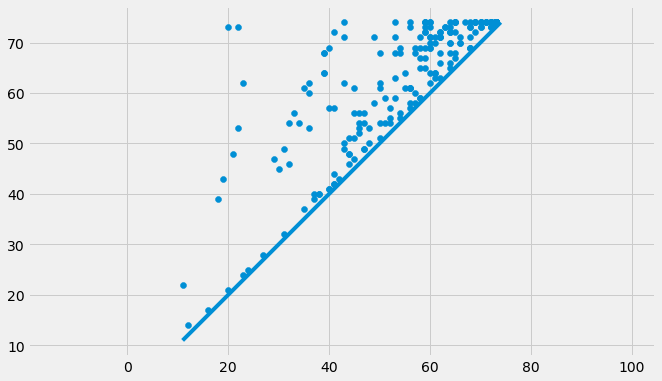

distributed.comm.inproc - WARNING - Closing dangling queue in <InProc local=inproc://129.67.184.177/8979/53 remote=inproc://129.67.184.177/8979/32>
distributed.comm.inproc - WARNING - Closing dangling queue in <InProc local=inproc://129.67.184.177/8979/55 remote=inproc://129.67.184.177/8979/32>
distributed.comm.inproc - WARNING - Closing dangling queue in <InProc local=inproc://129.67.184.177/8979/52 remote=inproc://129.67.184.177/8979/32>
distributed.comm.inproc - WARNING - Closing dangling queue in <InProc local=inproc://129.67.184.177/8979/54 remote=inproc://129.67.184.177/8979/32>
distributed.comm.inproc - WARNING - Closing dangling queue in <InProc local=inproc://129.67.184.177/8979/56 remote=inproc://129.67.184.177/8979/32>


In [29]:
d.plot.plot_diagram(dgms[0][1])

## Sliced Wasserstein Kernel

In [130]:
from sliced_wasserstein import SW_approx
SW_approx(dgms[0][1], dgms[1][1], 10)

1604.7705047993218

In [134]:
gram = np.array([[SW_approx(dgms[i][1], dgms[j][1], 10) for i in range(len(dgms))] for j in range(len(dgms))])
gram

array([[   0.        , 1604.7705048 , 2975.88462945, ...,  558.06580723,
        1724.7975378 , 1252.69928457],
       [1604.7705048 ,    0.        , 4437.3268448 , ..., 1216.64571558,
         586.30781314,  552.74430357],
       [2975.88462945, 4437.3268448 ,    0.        , ..., 3287.59668834,
        4627.91436412, 3967.09463224],
       ...,
       [ 558.06580723, 1216.64571558, 3287.59668834, ...,    0.        ,
        1397.47442011,  793.43030235],
       [1724.7975378 ,  586.30781314, 4627.91436412, ..., 1397.47442011,
           0.        ,  905.99096629],
       [1252.69928457,  552.74430357, 3967.09463224, ...,  793.43030235,
         905.99096629,    0.        ]])

In [ ]:
client.gather(client.map(lambda i, j: i+j, range(10), range(10)))